# クラスタ分析 -ラベルなしデータの分析
- 教師なし学習法に属するクラスタ分析について見ていく
- クラスタ分析では、正しい答えが事前にわかっていないデータから隠れた構造を見つけ出すことができる。
- クラスタリングの目標は、データを自然なグループにまとめる方法を見つけ出すことである。
- 同じクラスタのアイテムは異なるクラスタのアイテムよりも互いに類似している。

1.k-means法を使って類似点の中心を見つけ出す。

2.階層的クラスタ木をボトムアップ方式で構築する。

3.密度に基づくクラスタリングアプローチを使ってオブジェクトの任意の形状を識別する。

# 11.1 k-means法を使った類似度によるオブジェクトのグループ化
- ビジネスにおけるクラスタリングの用途としては、リコメンデーションエンジンのベースとして、異なるテーマのドキュメント、音楽、映画を同じグループにまとめることや、共通の購入履歴に基づいて同じような関心を持つ顧客を見つけることが挙げられる。
- k-means法はプロトタイプベースクラスタリングというカテゴリに属している。
- プロトタイプネースクラスタリングは各クラスがプロトタイプによって表されることを意味する。
- プロトタイプは、セントロイドかメドイドのどちらかになる。
- セントロイドは、特徴量が連続値の場合に、類似する点の中心を表す。
- メドイドは、特徴量がカテゴリ値の場合に、最も代表的または最も頻度の高い点を表す。
- k-meansほうが最も効果的なのは、球状のクラスタの識別である。
- kmeans法の問題点の１つは、クラスタの個数kを指定しなければならないことだ。

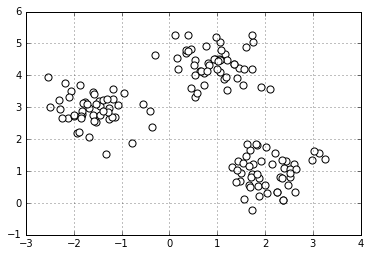

In [5]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=150,#サンプル点の総数
                n_features=2,#特徴量の個数
                centers=3,#クラスタの個数
                cluster_std=0.5,#クラスタ内標準偏差
                shuffle=True,#サンプルをシャッフル
                random_state=0)#乱数生成器の状態を指定
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,0],X[:,1],c='white',marker='o',s=50)
plt.grid()
plt.show()

- 特徴量の類似度に基づいてサンプルをグループ化することがここでの目標となる。
- kmeans法を使って実現できる。

1.クラスタの中心の初期値として、サンプル点からk個のセントロイドをランダムに選び出す。

2.各サンプルを最も近いセントロイド$\mu^{(j)}$に割り当てる。
$$\mu^{(j)},\, j\in \{1\ldots,k \}$$

3.セントロイドに割当られたサンプルの中心にセントロイドを移動する。

4.サンプル点へのクラスタの割当が変化しなくなるか、ユーザ定義の許容値またはイテレーションの最大回数に達するまでステップ2〜3を繰り返す。

- 類似度は「距離が離れていないこと」として定義できる。
- 連続値の特徴量を持つサンプルのクラスタリングにおいてよく使用される距離は、ユーグリッドの２乗である。
- m次元空間にある２つの点$\vec{x}$と$\vec{y}$のユーグリド距離の２乗は、以下のように定義できる。
$$d(\vec{x},\vec{y})^{2} = \sum^{m}_{j=1}(x_{j}-y_{j})^{2}=\| \vec{x}-\vec{y} \|^{2}_{2}$$
- インデックスjはサンプル点$\vec{x}$と$\vec{y}$のj次元目を表す。
- これ以降、上付き文字のiはサンプルのインデックス、jはクラスタのインデックスを表すものとする。

- クラスタ内誤差平方和（SSE）を反復的に最小化するという単純な最適化問題を取り上げる。
- クラスタ内誤差平方和は、クラスタの慣性とも呼ばれる。
$$SSE=\sum^{n}_{i=1}\sum^{k}_{j=1}w^{(i,j)}\| \vec{x}^{(i)} - \vec{\mu}^{(j)} \|^{2}_{2}$$
- $\mu^{(j)}$はクラスタjのセントロイドであり、サンプル点$\vec{x}^{(i)}$がクラスタ内に存在する場合は$w^{(i,j)}=1$、そうでない場合は$w^{(i,j)}=0$になる

In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, #クラスタの個数
           init='random', #セントロイドの初期値をランダムに選択
           n_init=10, #異なるセントロイドの初期値を用いたk-meansアルゴリズムの実行回数 
           #SSEが最も小さいモデルを最終モデルとして選択
           max_iter=300, #k-meansアルゴリズム内の最大イテレーション回数
           tol=1e-4, #収束判定するための相対的な許容誤差
           random_state=0) #セントロイドの初期化に持ちる乱数発生器の状態
y_km = km.fit_predict(X) #クラスタ中心の計算と各サンプルのインデックス予測